In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [9]:
a = np.random.rand(10, 10,5, 6)
b = a.tolist()
c = np.array(b)
a == c

array([[[[ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True]],

        [[ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True]],

        [[ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True]],

        ...,

        [[ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True],
         [ True,  True,  T

In [10]:
np.array(None)

array(None, dtype=object)

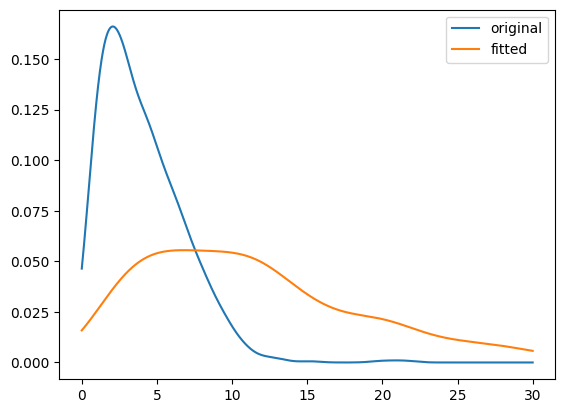

In [67]:
samples = stats.gamma.rvs(2, scale=2, size=1000)
fit = stats.gamma.fit(samples)
a, loc, scale = fit

new_dist = stats.gamma(a, loc, scale*3)
new_samples = new_dist.rvs(1000)
samples_density = stats.gaussian_kde(samples)
new_samples_density = stats.gaussian_kde(new_samples)
ran = np.linspace(0, 30, 1000)
plt.plot(ran, samples_density(ran), label='original')
plt.plot(ran, new_samples_density(ran), label='fitted')
plt.legend()

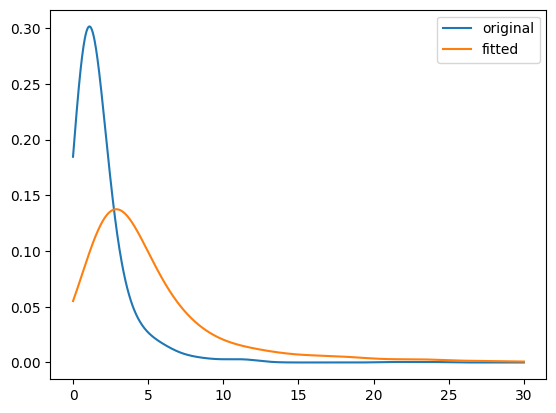

In [70]:
samples = stats.invgamma.rvs(2, scale=2, size=1000)

fit = stats.invgamma.fit(samples)
a, loc, scale = fit

new_dist = stats.invgamma(a, loc, scale*3)
new_samples = new_dist.rvs(1000)
samples_density = stats.gaussian_kde(samples)
new_samples_density = stats.gaussian_kde(new_samples)
ran = np.linspace(0, 30, 1000)
plt.plot(ran, samples_density(ran), label='original')
plt.plot(ran, new_samples_density(ran), label='fitted')
plt.legend()

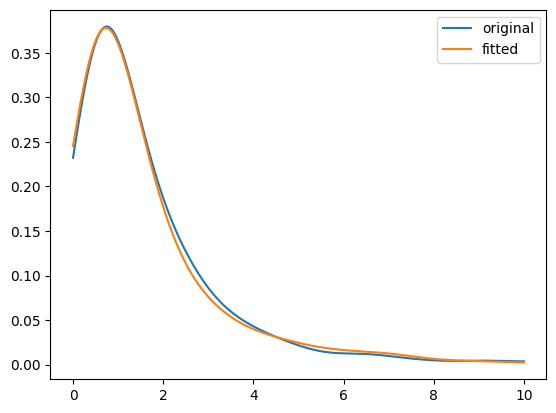

In [84]:
samples = stats.lognorm.rvs(1, scale=1, size=1000)

fit = stats.lognorm.fit(samples)
s, loc, scale = fit

new_dist = stats.lognorm(s, loc, scale)
new_samples = new_dist.rvs(1000)
samples_density = stats.gaussian_kde(samples)
new_samples_density = stats.gaussian_kde(new_samples)
ran = np.linspace(0, 10, 400)
plt.plot(ran, samples_density(ran), label='original')
plt.plot(ran, new_samples_density(ran), label='fitted')
plt.legend()


IndexError: list index out of range

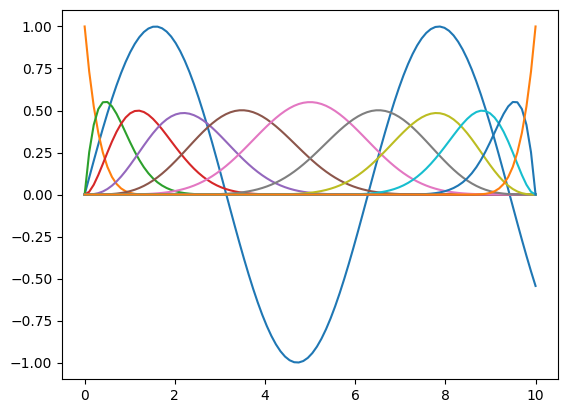

In [36]:
from scipy.interpolate import BSpline, splrep
import numpy as np
import matplotlib.pyplot as plt
def create_bspline_basis(xmin, xmax, p=3, nknots=5):
    """ 
    Compute a Bspline basis set where:

        :param p: order of spline (3 = cubic)
        :param nknots: number of knots (endpoints only counted once)

    """

    knots = np.linspace(xmin, xmax, nknots)
    k = np.concatenate(([xmin]*p, knots, [xmax]*p))  # pad the knot vector
    coeff = np.eye(nknots+p-1)
    B = [BSpline(k, c, p) for c in coeff]
    return B

knots = 7
degree = 5
spl = create_bspline_basis(0, 10, p=degree, nknots=knots)

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, label='original')
for i in range(knots+degree):
    plt.plot(x, spl[i](x), label=f'basis {i}')

plt.legend()

(100, 11)
(11, 1)


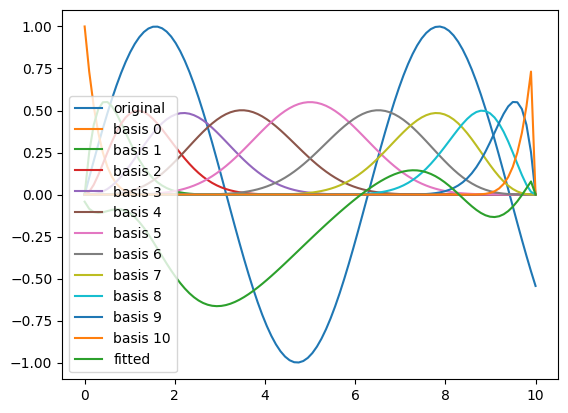

In [63]:
import bspline
from bspline import splinelab
def create_bspline_basis(xmin, xmax, p=3, nknots=5):
    """ 
    Compute a Bspline basis set where:

        :param p: order of spline (3 = cubic)
        :param nknots: number of knots (endpoints only counted once)

    """

    knots = np.linspace(xmin, xmax, nknots)
    k = splinelab.augknt(knots, p)       # pad the knot vector
    B = bspline.Bspline(k, p)
    return B

spl = create_bspline_basis(0, 10, p=degree, nknots=knots)

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, label='original')
basis = np.stack([spl(xi) for xi in x], 0)

for i in range(knots+degree-1):
    plt.plot(x, basis[:,i], label=f'basis {i}')

random_weights = np.random.randn(knots+degree-1)[:,None]
print(basis.shape)
print(random_weights.shape)
y_pred = basis @ random_weights
plt.plot(x, y_pred, label='fitted')

plt.legend()

In [73]:
knots = 7
degree = 5
spl = bspline.Bspline(splinelab.augknt(np.linspace(0, 10, knots), degree), degree)

17

In [69]:
spl.__dict__

new_spline = bspline.Bspline(spl.k, spl.p)

AttributeError: 'Bspline' object has no attribute 'k'